In [1]:
%matplotlib inline

In [2]:
#!pip install nearpy

In [3]:
import time
import numpy

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

from nearpy import Engine
from nearpy.hashes import RandomDiscretizedProjections
from nearpy.filters import NearestFilter, UniqueFilter
from nearpy.distances import EuclideanDistance
from nearpy.experiments import DistanceRatioExperiment

In [4]:
# Set dimension and vector count for this experiment
dimension = 100
vector_count = 10000


In [5]:
# Create data set from two clusters
vectors = []


In [6]:
center = numpy.random.randn(dimension)
for index in range(vector_count//2):
    vector = center + 0.01 * numpy.random.randn(dimension)
    vectors.append(vector)


center = numpy.random.randn(dimension)
for index in range(vector_count//2):
    vector = center + 0.01 * numpy.random.randn(dimension)
    vectors.append(vector)
    

In [7]:
# We are looking for the ten closest neighbours
nearest = NearestFilter(10)
# We want unique candidates
unique = UniqueFilter()


In [8]:
# We will fill this array with all the engines we want to test
engines = []

print('Creating engines...')


Creating engines...


In [9]:
# We are going to test these bin widths
bin_widths = [ 0.0001 * x for x in range(1,20)]


In [10]:
# Create engines for all configurations
for bin_width in bin_widths:
    # Use four random 1-dim discretized projections
    rdp1 = RandomDiscretizedProjections('rdp1', 1, bin_width)
    rdp2 = RandomDiscretizedProjections('rdp2', 1, bin_width)
    rdp3 = RandomDiscretizedProjections('rdp3', 1, bin_width)
    rdp4 = RandomDiscretizedProjections('rdp4', 1, bin_width)

    # Create engine with this configuration
    engine = Engine(dimension, lshashes=[rdp1, rdp2, rdp3, rdp4],
                    vector_filters=[unique, nearest])

    # Add engine to list of engines to evaluate
    engines.append(engine)


In [11]:
print('Creating experiment and performing exact search...')

# Create experiment (looking for ten closest neighbours).
# The constructor performs exact search for evaluation.
# So the data set should not be too large for experiments.
exp = DistanceRatioExperiment(10, vectors, coverage_ratio=0.2)


Creating experiment and performing exact search...

Starting exact search (query set size=2000)...

\Done with exact search...



In [12]:
print('Performing experiment for all engines...')

# Perform experiment for all engines
result = exp.perform_experiment(engines)


Performing experiment for all engines...
Engine 0 / 19
  distance_ratio=0.000000, result_size=6.648500, time=0.026298
Engine 1 / 19
  distance_ratio=0.109654, result_size=9.440500, time=0.032966
Engine 2 / 19
  distance_ratio=0.000000, result_size=9.889000, time=0.038465
Engine 3 / 19
  distance_ratio=0.000000, result_size=9.980000, time=0.042883
Engine 4 / 19
  distance_ratio=0.000000, result_size=9.993500, time=0.049659
Engine 5 / 19
  distance_ratio=0.000000, result_size=9.999500, time=0.058798
Engine 6 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.062898
Engine 7 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.068755
Engine 8 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.073296
Engine 9 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.081752
Engine 10 / 19
  distance_ratio=0.000000, result_size=9.999500, time=0.080915
Engine 11 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.090968
Engine 12 / 19
  distance_ra

In [13]:
# Collect these measures from all result items
distance_ratios = []
searchtimes = []
resultsizes= []


In [14]:
for item in result:
    distance_ratios.append(item[0])
    resultsizes.append(item[1])
    searchtimes.append(item[2])


Plotting resulting graph...


Text(0.5,1,'random discretized 1-dim projections')

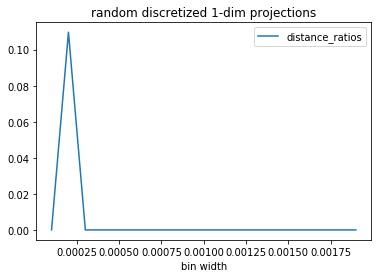

In [15]:
print('Plotting resulting graph...')

# Plot measures
ticks = bin_widths
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, distance_ratios)
ax.legend(['distance_ratios'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('distance_ratios.png')


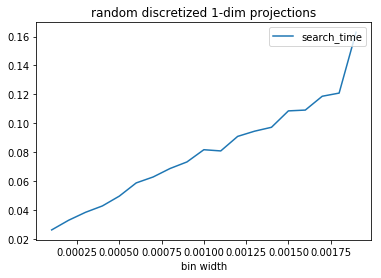

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, searchtimes)
ax.legend(['search_time'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('times.png')


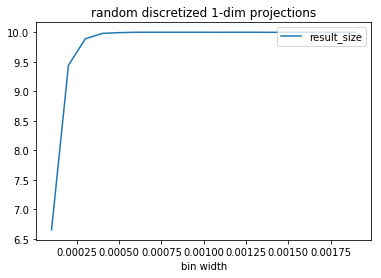

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, resultsizes)
ax.legend(['result_size'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('result_sizes.png')
